In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [6]:
x_train[50, 13, 13, 1]

0.21960784

In [8]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters=10, kernel_size=(4,4),
    strides=2, padding='same'
)(input_layer)

conv_layer_2 = Conv2D(
    filters=20, kernel_size=(3,3),
    strides=2, padding='same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)
output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)
model = Model(input_layer, output_layer)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [10]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [11]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 75us/step - loss: 1.8527 - acc: 0.3550 - val_loss: 1.7462 - val_acc: 0.3972
Epoch 2/10
50000/50000 [==============================] - 4s 72us/step - loss: 1.7391 - acc: 0.4033 - val_loss: 1.7213 - val_acc: 0.4069
Epoch 3/10
50000/50000 [==============================] - 4s 72us/step - loss: 1.7161 - acc: 0.4144 - val_loss: 1.7277 - val_acc: 0.4048
Epoch 4/10
50000/50000 [==============================] - 4s 75us/step - loss: 1.7030 - acc: 0.4187 - val_loss: 1.7140 - val_acc: 0.4085
Epoch 5/10
50000/50000 [==============================] - 4s 73us/step - loss: 1.6961 - acc: 0.4217 - val_loss: 1.7102 - val_acc: 0.4114
Epoch 6/10
50000/50000 [==============================] - 4s 74us/step - loss: 1.6898 - acc: 0.4244 - val_loss: 1.7166 - val_acc: 0.4123
Epoch 7/10
50000/50000 [==============================] - 4s 72us/step - loss: 1

In [15]:
model.layers[3].get_weights()

[]

In [20]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 0s 30us/step


[1.7315393209457397, 0.4013000041246414]

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

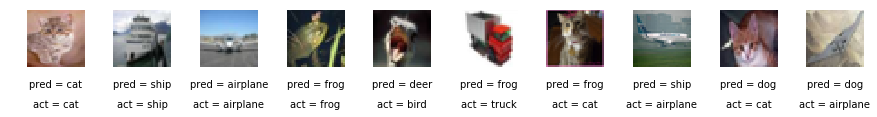

In [19]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

더 복잡한 모델 사용

In [22]:
input_layer = Input((32,32,3))

# Conv2D parameter 개수 = #output_channel(for bias) + #output_channel * (kernel_size)**2 * #input_channel
# 896 = 32 + 32 * 3 * 3 *3
x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
# TODO Batchnorm parameter 개수
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer, output_layer)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 32)        0         
__________

In [24]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [25]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 127s 3ms/step - loss: 1.5555 - acc: 0.4506 - val_loss: 1.3041 - val_acc: 0.5372
Epoch 2/10
50000/50000 [==============================] - 130s 3ms/step - loss: 1.1369 - acc: 0.6003 - val_loss: 1.0366 - val_acc: 0.6354
Epoch 3/10
50000/50000 [==============================] - 128s 3ms/step - loss: 0.9941 - acc: 0.6519 - val_loss: 0.9782 - val_acc: 0.6561
Epoch 4/10
50000/50000 [==============================] - 129s 3ms/step - loss: 0.9112 - acc: 0.6828 - val_loss: 0.8573 - val_acc: 0.7010
Epoch 5/10
50000/50000 [==============================] - 135s 3ms/step - loss: 0.8472 - acc: 0.7043 - val_loss: 0.8606 - val_acc: 0.6995
Epoch 6/10
50000/50000 [==============================] - 136s 3ms/step - loss: 0.7989 - acc: 0.7216 - val_loss: 0.8597 - val_acc: 0.6979
Epoch 7/10
50000/50000 [==============================] - 130s 3ms/step - loss: 0.7550 - acc: 0.7386 - val_loss: 0.8264 - 